In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.transform import Rotation
# Edits
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import pylcp
import pylcp.atom as atom
from pylcp.common import cart2spherical
from pylcp.fields import gaussianBeam
#plt.style.use('paper')

In [11]:
gamma = 2*np.pi*30e6
t0 = 1e-5 # s
gammabar = gamma*t0

delta = -1.5*gammabar
beta = 1.0

In [12]:
k = np.array([1., 1., 1.])
k = k/np.linalg.norm(k)
laserBeam = gaussianBeam(kvec=np.array([0., 0., 1.]), pol=np.array([1., 1.j, 0]), beta=beta, delta=delta, wb=20., r0=np.array([0., 0., 0.]))
laserBeam.local_parameters(np.array([100., 10., 1.]), 0.)

(array([2.49992961e-03, 2.49992961e-04, 9.99996844e-01]),
 array([ 1.41421133e+00+9.81307787e-18j, -2.49992961e-03-2.49992961e-04j,
         2.18749187e-06+4.41917550e-07j]),
 1.1712944615516224e-22)

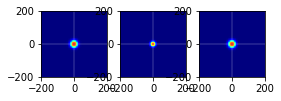

In [13]:
x_beta = 200
X, Y = np.meshgrid(np.linspace(-x_beta, x_beta, 101),
                   np.linspace(-x_beta, x_beta, 101))
z_tests = [-1*laserBeam.zr, 0, laserBeam.zr] # position

plt.figure("Laser Beams", figsize=(4, 1.5*6)) # 6 beams
plt.clf()
# pr = cProfile.Profile()

for ii, z_test in enumerate(z_tests):
    Z = z_test*np.ones(X.shape)
    Rt=np.array([X, Y, Z])

    #pr.enable()
    """it = np.nditer([X, Y, Z, None])
    for (x, y, z, beta) in it:
        beta[...] = laserBeam.beta(np.array([x, y, z]), 0.)
    BETA = it.operands[3]"""
    #pr.disable()
    
    #pr.enable()
    BETA = laserBeam.beta(Rt)
    #pr.disable()

    plt.subplot(1., len(z_tests), ii+1)
    plt.imshow(BETA, origin='lower',
               extent=(-x_beta, x_beta,
                       -x_beta, x_beta))
    # plt.clim((0, 1))
    plt.set_cmap('jet')
    # Make a cross-hair:
    plt.plot([0, 0], [-x_beta, x_beta],
             'w-', linewidth=0.25)
    plt.plot([-x_beta, x_beta], [0, 0],
             'w-', linewidth=0.25)

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


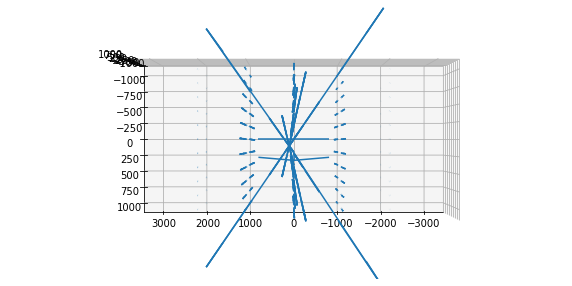

In [14]:
# def axisEqual3D(ax):
#     extents = np.array([getattr(ax, 'get_{}lim'.format(dim))() for dim in 'xyz'])
#     sz = extents[:,1] - extents[:,0]
#     centers = np.mean(extents, axis=1)
#     maxsize = max(abs(sz))
#     r = maxsize/2
#     for ctr, dim in zip(centers, 'xyz'):
#         getattr(ax, 'set_{}lim'.format(dim))(ctr - r, ctr + r)

laserBeam = gaussianBeam(kvec=2*np.pi/461.*np.array([0.,0.,1.])/np.sqrt(3), pol=np.array([1., 1.j, 0.]), beta=beta, delta=delta, \
                         wb=200., r0=np.array([100.,100.,0.])) # Change the laser beam attributes

print(laserBeam.rmat)

fig = plt.figure(figsize=(10,5)) # Change the size of the plot
ax = fig.gca(projection='3d')

# Make the grid
z, y, x = np.meshgrid(np.arange(-1000., 1001., 200.),
                      np.arange(-1000., 1001., 200.),
                      np.arange(-3000., 3001., 1000.)) # Change the axis

Rt=np.array([x, y, z])

# Make the direction data for the arrows
# u = np.sin(np.pi * x) * np.cos(np.pi * y) * np.cos(np.pi * z)
# v = -np.cos(np.pi * x) * np.sin(np.pi * y) * np.cos(np.pi * z)
# w = (np.sqrt(2.0 / 3.0) * np.cos(np.pi * x) * np.cos(np.pi * y) *
#      np.sin(np.pi * z))


arr = laserBeam.kvec(Rt)*20000
kx = arr[0]
ky = arr[1]
kz = arr[2]

i = laserBeam.beta(Rt)

ax.quiver(x,y,z,i*kx,i*ky,i*kz)
ax.view_init(90, 90) # change this to see different viewing angles

plt.show()

(501973807.6906752+101349396.88726261j)


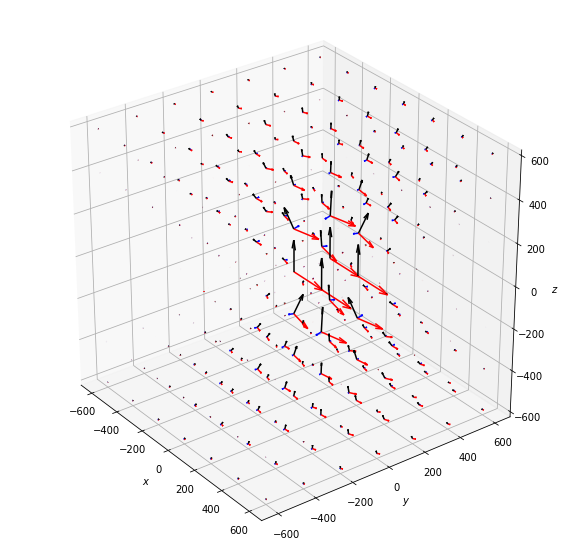

In [15]:
fig = plt.figure(figsize=(10,10)) # Change the size of the plot
ax = fig.gca(projection='3d')

# Make the grid
x, y, z = np.meshgrid(np.arange(-600., 601., 200.),
                      np.arange(-600., 601., 200.),
                      np.arange(-600., 601., 200.)) # Change the axis

Rt=np.array([x, y, z])

arrb, arr1b, ib = laserBeam.local_parameters(Rt)
arr = arrb*20000
arr1 = arr1b*20000
i = ib/50

#arr = laserBeam.kvec(Rt)*20000
kx = arr[0]
ky = arr[1]
kz = arr[2]

#i = laserBeam.beta(Rt)/50

#arr1 = laserBeam.cartesian_pol(Rt)*20000
p0 = arr1[0]
p1 = arr1[1]
p2 = arr1[2]

#print(np.amax(np.sqrt(kx**2+ky**2+kz**2)))
print(np.amax(kx*np.conj(p0)+ky*np.conj(p1)+kz*np.conj(p2))) # Need to divide out because of the 20000 multiplied
#print(np.amax(p1))


#quiver3(r(:,1),r(:,2),r(:,3),Ip.*k(:,1),Ip.*k(:,2),Ip.*k(:,3),'k')
ax.quiver(x,y,z,i*kx,i*ky,i*kz, color='k')

#quiver3(r(:,1),r(:,2),r(:,3),Ip.*real(P(:,1)),Ip.*real(P(:,2)),Ip.*real(P(:,3)),'r')
ax.quiver(x,y,z,i*np.real(p0),i*np.real(p1),i*np.real(p2), color='r')

#quiver3(r(:,1),r(:,2),r(:,3),Ip.*imag(P(:,1)),Ip.*imag(P(:,2)),Ip.*imag(P(:,3)),'b')
ax.quiver(x,y,z,i*np.imag(p0),i*np.imag(p1),i*np.imag(p2), color='b')

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')  
ax.set_zlabel('$z$')

ax.view_init(30, -37) # change this to see different viewing angles

plt.show()